In [1]:
#Packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Importation of networks and attributes
ELadvice=  nx.read_edgelist('ELadvice_edgelist.txt',comments="node",create_using=nx.DiGraph(),nodetype=int)
ELcowork =  nx.read_edgelist('ELcowork_edgelist.txt',comments="node",create_using=nx.Graph(),nodetype=int)
ELfriend = nx.read_edgelist('ELfriend_edgelist.txt',comments="node",create_using=nx.DiGraph(),nodetype=int)
attr = pd.read_table('ELnodeAttributes.txt', sep = "\t")

In [3]:
#Association of attribute with network ElFriend
ELNodeData = attr.set_index('Node').to_dict('index').items()
ELfriend.add_nodes_from(ELNodeData)

In [8]:
#Association for the other networks 
ELadvice.add_nodes_from(ELNodeData)
ELcowork.add_nodes_from(ELNodeData)

In [4]:
#Proportion of women 
attr['Gender'].value_counts(normalize=True)

Gender
1    0.746479
2    0.253521
Name: proportion, dtype: float64

25% of the lawyers are women in our sample. 

In [5]:
Deg = dict(ELfriend.in_degree())

In [7]:
genre_degrees = {}

#We get the degree by gender
for node, data in ELNodeData:  
    genre = data.get('Gender') 
    if genre:
        if genre not in genre_degrees:
            genre_degrees[genre] = []
        genre_degrees[genre].append(Deg.get(node, 0))

# Calculus of average degree
average_degree_by_genre = {}
for genre, degrees in genre_degrees.items():
    average_degree_by_genre[genre] = sum(degrees) / len(degrees)

# Print
for genre, avg_degree in average_degree_by_genre.items():
    print(f"{genre}: {avg_degree}")

1: 8.056603773584905
2: 8.222222222222221


In [54]:
#Conversion of the attributes in a dataframe
df = pd.DataFrame.from_dict(ELNodeData)
df[1] = df[1].astype(str)
df = df[1].str.split(":", expand=True)
df = df.rename(columns={1 : 'status', 2: 'Gender', 3: 'Office', 4:'Senior', 5:'Age', 6:'Spec', 7:'School'})
df = df.drop(0, axis=1)
#We just keep the value
for i in range(0, df.shape[0]):
        df["School"][i]=df["School"][i].replace("}",'')
for i in range(0, df.shape[0]):
        df["status"][i]=df["status"][i].replace(", 'Gender'",'')
for i in range(0, df.shape[0]):
        df["Gender"][i]=df["Gender"][i].replace(", 'Office'",'')
for i in range(0, df.shape[0]):
        df["Office"][i]=df["Office"][i].replace(", 'Senior'",'')
for i in range(0, df.shape[0]):
        df["Senior"][i]=df["Senior"][i].replace(", 'Age'",'')
for i in range(0, df.shape[0]):
        df["Age"][i]=df["Age"][i].replace(", 'Spec'",'')
for i in range(0, df.shape[0]):
        df["Spec"][i]=df["Spec"][i].replace(", 'School'",'')

df

/tmp/ipykernel_293/2746766153.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["School"][i]=df["School"][i].replace("}",'')
/tmp/ipykernel_293/2746766153.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

,status,Gender,Office,Senior,Age,Spec,School
0,1,1,1,31,64,1,1
1,1,1,1,32,62,2,1
2,1,1,2,13,67,1,1
3,1,1,1,31,59,2,3
4,1,1,2,31,59,1,2
...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2
67,2,1,1,1,26,1,3
68,2,2,1,1,38,1,3
69,2,1,1,1,31,2,2


<function matplotlib.pyplot.show(close=None, block=None)>

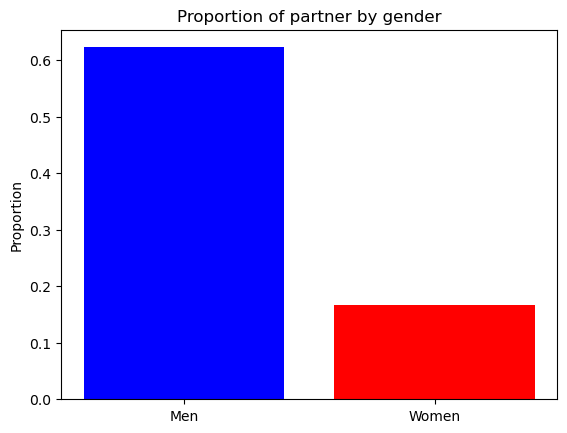

In [79]:
#Repartition of partner and associate by gender 
for colonne in df.columns: #Convert in number 
    df[colonne] = pd.to_numeric(df[colonne])

#Number of status by gender
nb_pm = df[(df['status'] == 1) & (df['Gender'] == 1)].shape[0] #Number of men partner 
nb_pf = df[(df['status'] == 1) & (df['Gender'] == 2)].shape[0] #Number of women partner 
nb_am = df[(df['status'] == 2) & (df['Gender'] == 1)].shape[0] #Number of men associate 
nb_af = df[(df['status'] == 2) & (df['Gender'] == 2)].shape[0] #Number of women associate

#proportion
prop_pm = nb_pm/(nb_pm + nb_am)
prop_pf = nb_pf/(nb_pf + nb_af)

#graph
plt.bar(["Men", "Women"],[prop_pm, prop_pf], color =['Blue', 'red'])
plt.ylabel('Proportion')
plt.title ('Proportion of partner by gender')
plt.show

Here, we will compare distribution of centrality by gender. We will look it for advice, for example. 

Note des trus à faire :
- Comparer centralité
- Random graph
- Comparer statuts

In [39]:
df.shape[0]

71

In [66]:
df.columns

Index(['status', 'Gender', 'Office', 'Senior', 'Age', 'Spec', 'School'], dtype='object')